# Can we spot the reason for $\Delta \phi$ resolution being worse in MicroBooNE than in MINERvA?
We hypothesized that its due to kinematics, but why does larger $E_\nu$ lead to smaller $\Delta \phi$ resolution?

In [1]:
import sys; sys.path.insert(0, '../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/RejectingCosBGInLArTPC/Figures/DeltaPhi/'

# MC-bnb/DATA-cosmic

In [3]:
versions['overlay date'] = '2018_09_25'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
OverlaySamples = load_samples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')

# cuts_pureff = apply_cuts_MCbnbDATAcosmic()
# pureff_MCbnbDATAcosmic,pureff_MCbnbDATAcosmic_numbers = cuts_pureff

285038 ccqe candidate pairs, 180092 in FV
74392 are 1mu-1p, 41.3%
55230 are other-pairs, 30.7%
155416 are cosmic, 86.3%
--------------------------------------------------------------
37228 are CC1p, 20.7%
I finished loading overlay samples. We have in total 285038 pairs


In [7]:
versions['overlay date'] = '2018_04_28'
versions['Overlay'] = 'prodgenie_numi_nu_cosmic_uboone_mcc8_reco2'
numi = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/2018_04_28/prodgenie_numi_nu_cosmic_uboone_mcc8_reco2_2018_04_28_vertices.csv')

In [8]:
NUMI_mup = numi[numi['1mu-1p']==True]

In [ ]:
fig=plt.figure(figsize=(16,16))
res_Delta_Phi = BNB_mup['delta_phi']-BNB_mup['truth_delta_phi']

for ivar,(var,title,xlabel,binsx) in enumerate(zip([BNB_mup['l_muCandidate'],BNB_mup['l_pCandidate'],BNB_mup['truth_l_muCandidate'],BNB_mup['truth_l_pCandidate']]                    
                                             ,['reco $\mu$ track length','reco $p$ track length','truth $\mu$ track length','truth $p$ track length']
                                             ,[r' $l_{\mu}^{reco.}$ [cm]',r'$l_{p}^{reco.}$ [cm]',r' $l_{\mu}^{gen.}$ [cm]',r'$l_{p}^{gen.}$ [cm]']
                                                   ,[linspace(0,250,51),linspace(0,70,51),linspace(0,250,51),linspace(0,70,51)])):
    ax = fig.add_subplot(2,2,ivar+1)
    plot_2d_hist(var,res_Delta_Phi
                 ,xlabel=xlabel,ylabel=r'$\Delta \phi^{rec.}-\Delta \phi^{gen.}$'
                 ,bins=(binsx,linspace(-30,30,51)),ax=ax);
    ax.set_title(title,fontsize=25)
    
plt.tight_layout()

In [10]:
from scipy.optimize import leastsq
from scipy.stats import norm                                                                                                                                                                                                                                                                                                                                                                                                                   
from scipy.optimize import curve_fit

calculating sigma in 0.0<Ev<1.0
36974 events in sample
32091 events in truncated sample
sigma: 8.00539938027 +/- 0.106714515567
calculating sigma in 1.0<Ev<2.0
34273 events in sample
29706 events in truncated sample
sigma: 7.36871582283 +/- 0.122072790125
calculating sigma in 2.0<Ev<inf
3142 events in sample
2645 events in truncated sample
sigma: 7.68261837778 +/- 0.116913050075
done.


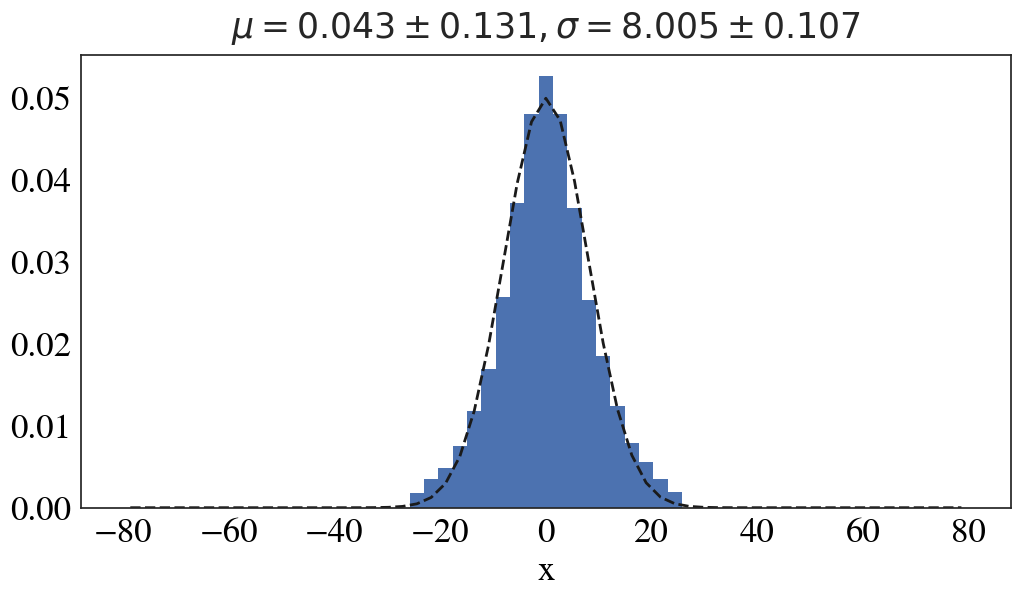

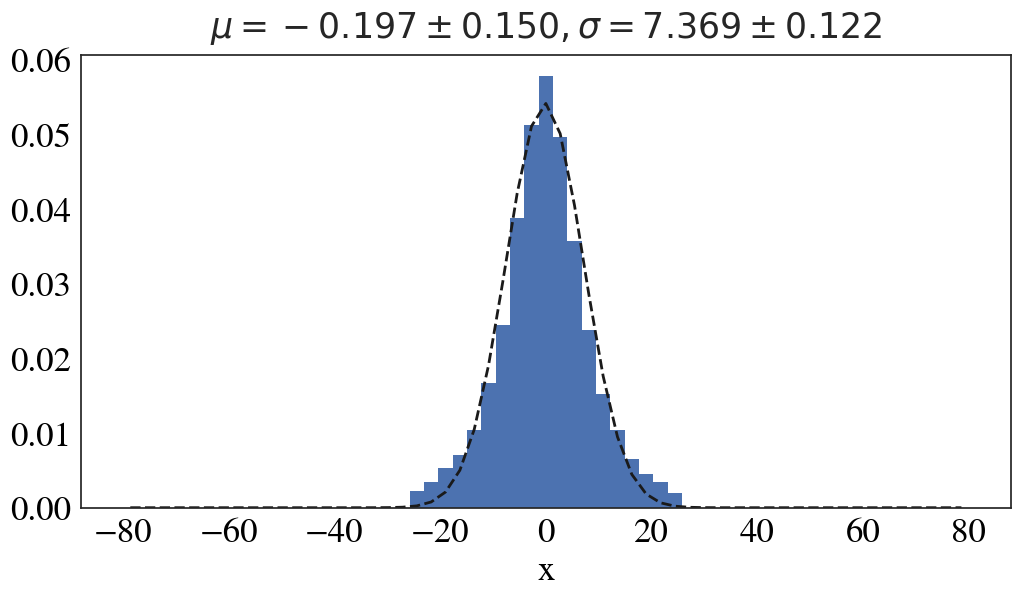

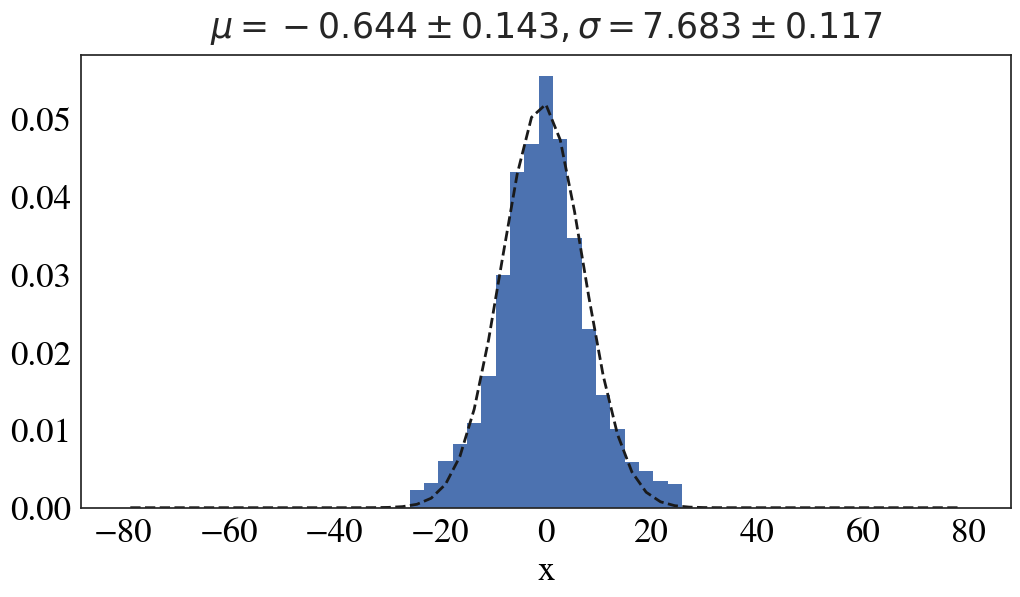

In [11]:
EvMin_array = [0,1,2]#]#0,
EvMax_array = [1,2,np.inf]#]#1,
EvMean_array,EvStd_array = [],[]
sigma_array,sigma_err_array = [],[]
for EvMin,EvMax in zip(EvMin_array,EvMax_array):
    print 'calculating sigma in %.1f<Ev<%.1f'%(EvMin,EvMax)
    sample = BNB_mup[(BNB_mup['closest_genie_Ev']>EvMin)&(BNB_mup['closest_genie_Ev']<EvMax)]
    delta = (sample['truth_delta_phi'] - sample['delta_phi'])

    truncated = sample[np.abs(sample['truth_delta_phi'] - sample['delta_phi'])<25]
    delta_truncated = (truncated['truth_delta_phi'] - truncated['delta_phi'])
    print len(delta),'events in sample'
    print len(delta_truncated),'events in truncated sample'
    #     h_truncated,bins = np.histogram( delta , bins = linspace(-80,80,60),normed=1)
    h_truncated,bins = np.histogram( delta_truncated , bins = linspace(-80,80,60),normed=1)
    mid = 0.5*(bins[1:]+bins[:-1])    
    xdata = mid
    ydata = h_truncated
    pars, cov = curve_fit(lambda x, mu, sig : norm.pdf(x, loc=mu, scale=sig), xdata, ydata, p0=[0,9])  
    mu,sigma = pars
    mu_err,sigma_err = np.sqrt(cov[0,0]),np.sqrt(cov[1,1])
    fig,ax=plt.subplots(figsize=(12,6))
    plt.bar(mid,h_truncated,width=mid[1]-mid[0])
    ax.plot(xdata, norm.pdf(xdata,*pars), 'k--',linewidth = 2, label='fit before')    
    set_axes(ax,'x',title=r'$\mu=%.3f \pm %.3f, \sigma=%.3f \pm %.3f$'%(pars[0],np.sqrt(cov[0,0]), pars[1], np.sqrt(cov[1,1 ])))
    EvMean_array.append(np.mean(truncated['closest_genie_Ev']))
    EvStd_array.append(np.std(truncated['closest_genie_Ev']))
    sigma_array.append(sigma)
    sigma_err_array.append(sigma_err)
    print 'sigma:',sigma,'+/-',sigma_err
print 'done.'

In [12]:
print 'sigma_array:',sigma_array
print 'sigma_err_array:',sigma_err_array

sigma_array: [8.0053993802709353, 7.3687158228287926, 7.6826183777760351]
sigma_err_array: [0.10671451556702655, 0.12207279012511923, 0.11691305007514986]


In [13]:
EvMin,EvMax = 2,4
NUMI_mup_Ev_high = NUMI_mup[(NUMI_mup['closest_genie_Ev']>EvMin)&(NUMI_mup['closest_genie_Ev']<EvMax)]
# NUMI_mup_Ev_high = NUMI_mup[NUMI_mup['closest_genie_Ev']>EvMin]

64445 events in trunctated sample
2582 events in trunctated sample
390 events in trunctated sample
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/RejectingCosBGInLArTPC/Figures/ResponseToReviewers/delta_phi_resolution_BNB_NUMI.pdf


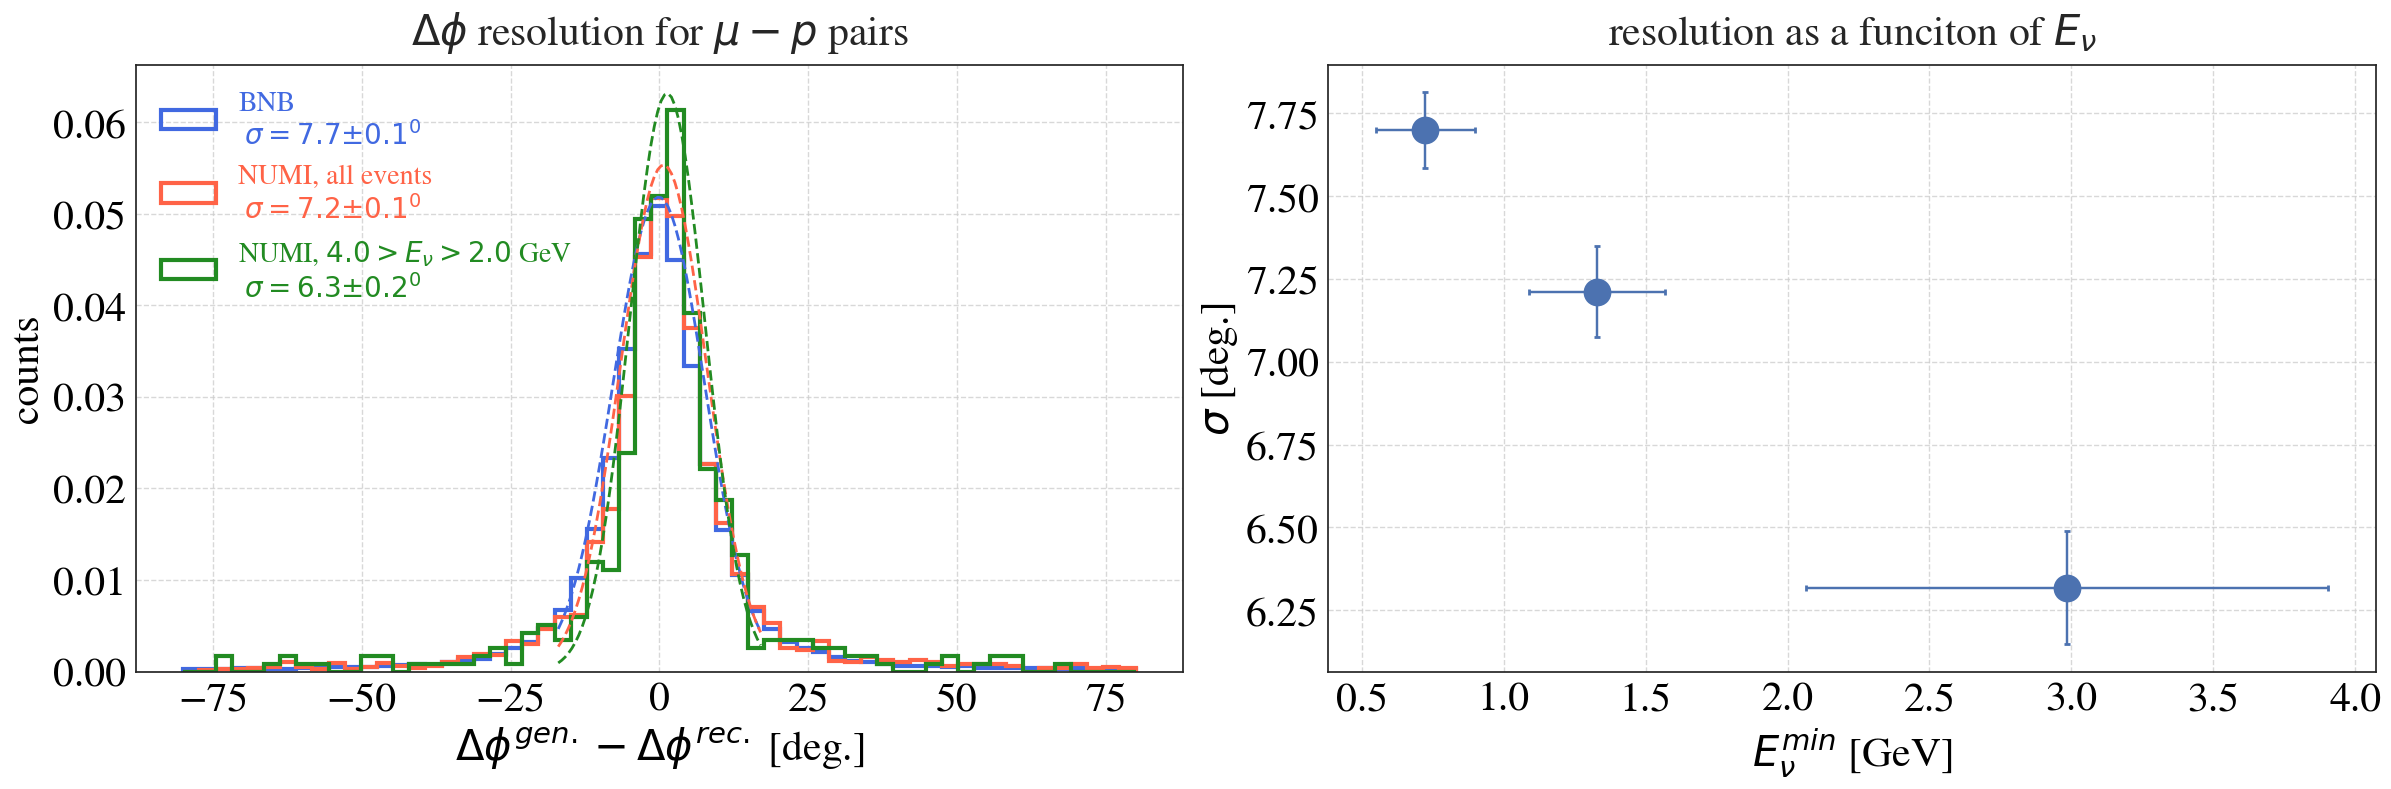

In [17]:
sigma_array,sigma_err_array=[],[]
fig=plt.figure(figsize=(24,8))
ax = fig.add_subplot(1,2,1)
for sample,slabel,scolor in zip([BNB_mup,NUMI_mup,NUMI_mup_Ev_high]
                               ,[r'BNB',r'NUMI, all events',r'NUMI, $%.1f>E_\nu>%.1f$ GeV'%(EvMax,EvMin)]
                               ,['royalblue','tomato','forestgreen']):
    delta = (sample['truth_delta_phi'] - sample['delta_phi'])

    truncated = sample[np.abs(sample['truth_delta_phi'] - sample['delta_phi'])<25]
    delta_truncated = (truncated['truth_delta_phi'] - truncated['delta_phi'])
    print len(delta_truncated),'events in trunctated sample'
    h_truncated,bins = np.histogram( delta_truncated , bins = linspace(-80,80,60))
    mid = 0.5*(bins[1:]+bins[:-1])
    h_truncated,bins = np.histogram( delta_truncated , bins = linspace(-80,80,60),normed=1)
    mid = 0.5*(bins[1:]+bins[:-1])    
    xdata = mid
    ydata = h_truncated
    pars, cov = curve_fit(lambda x, mu, sig : norm.pdf(x, loc=mu, scale=sig), xdata, ydata, p0=[0,9])  
    mu,sigma = pars
    sigma_array.append(sigma)
    mu_err,sigma_err = np.sqrt(cov[0,0]),np.sqrt(cov[1,1])
    sigma_err_array.append(sigma_err)
    xfit = linspace(-17,17,60)
    ax.plot(xfit, norm.pdf(xfit,*pars), 'k--',linewidth = 2, color=scolor)

    h,bins,_=ax.hist(delta,bins=np.linspace(-80,80,60),normed=1
                             ,histtype='step'
                             ,color=scolor
                             ,edgecolor=scolor
                             ,linewidth=3
                             ,label = slabel + '\n'+ r' $\sigma=%.1f$'%sigma+'$\pm%.1f$'%sigma_err+'$^0$')

    set_axes(ax,r'$\Delta \phi^{gen.}-\Delta \phi^{rec.}$ [deg.]' , 'counts' 
                 ,fontsize=30,do_add_grid=True
                 ,xticks=[-75,-50,-25,0,25,50,75],title='$\Delta \phi$ resolution for $\mu-p$ pairs'
                )     
leg = plt.legend(fontsize=20,loc='upper left')
for text,scolor in zip(leg.get_texts(),['royalblue','tomato','forestgreen']):
        text.set_color(scolor)
plt.tight_layout()

ax = fig.add_subplot(1,2,2)
# plt.plot(EvMin_array,sigma_array)
plt.errorbar(x=EvMean_array,xerr=EvStd_array
             ,y=sigma_array,yerr=sigma_err_array,fmt='o',capthick=2,capsize=2,ms=20)

set_axes(ax,r'$E_{\nu}^{min}$ [GeV]' , r'$\sigma$ [deg.]'           
         ,fontsize=30,do_add_grid=True
         ,title=r'resolution as a funciton of $E_\nu$'
                )    
plt.tight_layout()
filename = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/RejectingCosBGInLArTPC/Figures/ResponseToReviewers/delta_phi_resolution_BNB_NUMI.pdf'
fig.savefig(filename)
print 'saved',filename

NameError: name 'kafe' is not defined

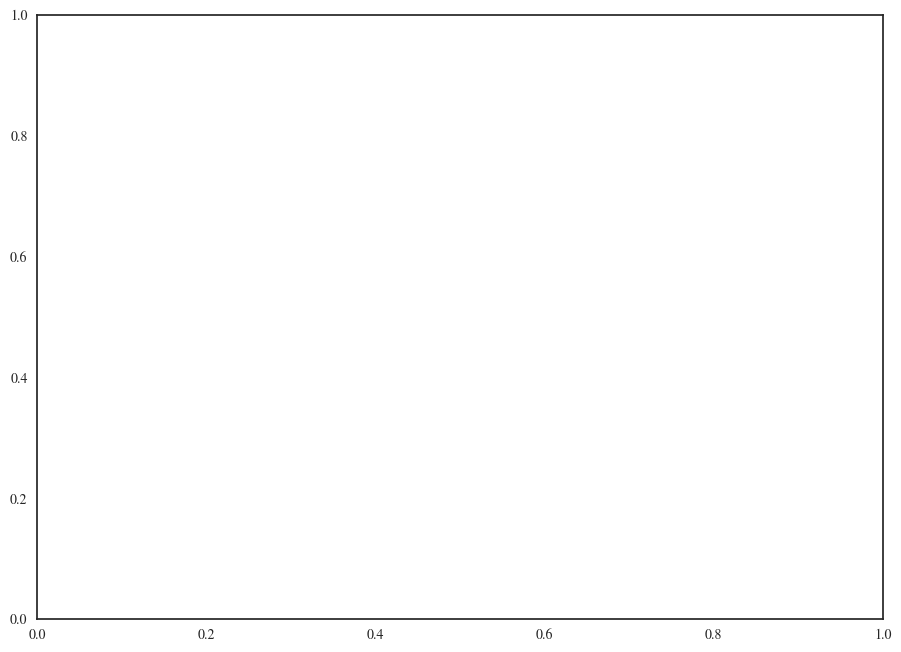

In [9]:
fig=plt.figure(figsize=(24,8))
ax = fig.add_subplot(1,2,1)
sample = BNB_mup
slabel = 'BNB'
scolor = 'royalblue'
delta = (sample['truth_delta_phi'] - sample['delta_phi'])

truncated = sample[np.abs(sample['truth_delta_phi'] - sample['delta_phi'])<25]
delta_truncated = (truncated['truth_delta_phi'] - truncated['delta_phi'])
h_truncated,bins = np.histogram( delta_truncated , bins = linspace(-80,80,60))
mid = 0.5*(bins[1:]+bins[:-1])
hdataset = kafe.Dataset(data=[mid,h_truncated]);
# error for bins with zero contents is set to 1.
covmat = hdataset.get_cov_mat('y')
for i in range(0, len(covmat)): 
    if covmat[i, i] == 0.: 
        covmat[i, i] = 1.
hdataset.set_cov_mat('y', covmat) # write it back
hfit = kafe.Fit(hdataset, gauss, fit_label="Fit of a Gaussian to histogram data")
hfit.call_minimizer(final_fit=False, verbose=False)
fdata=hfit.fit_function.evaluate(hfit.xdata, hfit.current_parameter_values)
np.fill_diagonal(covmat, fdata)
hfit.current_cov_mat = covmat  # write back new covariance matrix
hfit.do_fit(quiet=True)
mu,sigma,a0 = hfit.get_parameter_values(rounding=True)
mu_err,sigma_err,a0_err = hfit.get_parameter_errors(rounding=True)

h,bins,_=ax.hist(delta,bins=np.linspace(-80,80,60),normed=1
                             ,histtype='step'
                             ,color=scolor
                             ,edgecolor=scolor
                             ,linewidth=3
                             ,label = slabel + '\n'+ r' $\sigma=%.1f$'%sigma+'$\pm%.1f$'%sigma_err+'$^0$')
set_axes(ax,r'$\Delta \phi^{gen.}-\Delta \phi^{rec.}$ [deg.]' , 'counts' 
                 ,fontsize=30,do_add_grid=True
                 ,xticks=[-75,-50,-25,0,25,50,75],title='$\Delta \phi$ resolution for $\mu-p$ pairs'
                )     

leg = plt.legend(fontsize=20,loc='upper left')
for text,scolor in zip(leg.get_texts(),['royalblue','tomato','forestgreen']):
        text.set_color(scolor)
plt.tight_layout()




ax = fig.add_subplot(1,2,2)
# plt.plot(EvMin_array,sigma_array)
plt.errorbar(x=EvMean_array,xerr=EvStd_array,y=sigma_array,yerr=sigma_err_array,fmt='o',capthick=2,capsize=2,ms=20)

set_axes(ax,r'$E_{\nu}^{min}$ [GeV]' , r'$\sigma$ [deg.]'           
         ,fontsize=30,do_add_grid=True
         ,title=r'resolution as a funciton of $E_\nu$'
                )    

plt.tight_layout()




In [ ]:
EvMin,EvMax=0,5
print 'calculating sigma in %.1f<Ev<%.1f'%(EvMin,EvMax)
sample = NUMI_mup[(NUMI_mup['closest_genie_Ev']>EvMin)&(NUMI_mup['closest_genie_Ev']<EvMax)]
#     sample = sample[np.abs(sample['truth_delta_phi'] - sample['delta_phi'])<50]
delta = (sample['truth_delta_phi'] - sample['delta_phi'])
truncated = sample[np.abs(sample['truth_delta_phi'] - sample['delta_phi'])<25]
delta_truncated = (truncated['truth_delta_phi'] - truncated['delta_phi'])
print len(delta),'events in sample'
print len(delta_truncated),'events in truncated sample'
h_truncated,bins = np.histogram( delta , bins = linspace(-80,80,100))
#     h_truncated,bins = np.histogram( delta_truncated , bins = linspace(-80,80,60))
mid = 0.5*(bins[1:]+bins[:-1])
hdataset = kafe.Dataset(data=[mid,h_truncated]);
# error for bins with zero contents is set to 1.
covmat = hdataset.get_cov_mat('y')
for i in range(0, len(covmat)): 
    if covmat[i, i] == 0.: 
        covmat[i, i] = 1.
hdataset.set_cov_mat('y', covmat) # write it back

hfit = kafe.Fit(hdataset, gauss, fit_label="Fit of a Gaussian to histogram data")
plt.figure()
hplot = kafe.Plot(hfit)
hplot.plot_all()
hplot.show()


hfit.call_minimizer(final_fit=False, verbose=False)
fdata=hfit.fit_function.evaluate(hfit.xdata, hfit.current_parameter_values)
np.fill_diagonal(covmat, fdata)
hfit.current_cov_mat = covmat  # write back new covariance matrix
# hfit.minos_errors(0.2)
hfit.do_fit()
mu,sigma,a0 = hfit.get_parameter_values(rounding=True)
mu_err,sigma_err,a0_err = hfit.get_parameter_errors(rounding=True)
    
print 'sigma:',sigma,'+/-',sigma_err
print 'done.'